# Naive Bayesian

Here, we use a NB model to predict in which country a beach cleanup event occured.
This may or may not be used in the final system, but it is a nice practice of NB models either way.

First, let's load in the data.

In [1]:
import pandas as pd
import sqlite3

cleanups = pd.read_csv('../data/new-cleanups.csv')
cleanups = cleanups.drop(columns=['Cleanup ID', 'Zone', 'State', 'GPS', 'Cleanup Type', 'Cleanup Date', 'Group Name'])
cleanups

/Users/abhinavmadahar/Documents/ocean_plastic_pollution/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Country,Adults,Children,People,Kilograms,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),...,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Gloves & Masks (PPE),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,United States,1.0,0.0,1.0,123.83,1.0000,5.0,300,1000,0,...,60,0,1,0,0,0,500,2000,1000,5990.0
1,United States,1.0,0.0,1.0,2.27,0.5000,3.0,1,8,10,...,0,0,0,0,0,0,2,8,7,57.0
2,Australia,2.0,0.0,2.0,0.71,0.0479,0.0,0,3,1,...,0,0,0,0,2,0,0,0,100,126.0
3,Australia,2.0,0.0,2.0,0.13,0.0262,0.0,0,2,0,...,0,0,0,0,0,0,0,0,10,20.0
4,Seychelles,1.0,0.0,1.0,1.18,1.4900,0.0,4,0,0,...,0,0,0,0,0,0,0,0,27,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48363,United States,1.0,0.0,1.0,2.20,0.0000,0.0,0,6,0,...,0,0,0,0,0,0,0,0,7,43.0
48364,NaN,3.0,0.0,3.0,0.69,0.0000,0.0,10,12,1,...,0,0,0,0,0,5,0,0,2,49.0
48365,NaN,3.0,0.0,3.0,2.11,0.0000,0.0,11,14,5,...,0,0,0,0,0,5,0,0,3,89.0
48366,NaN,1.0,0.0,1.0,0.91,0.0000,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


We have so much data for the US that it overpowers the rest of the dataset.
We have to hide the US data.

In [2]:
cleanups = cleanups[cleanups['Country'] != 'United States'].reset_index()
cleanups

,index,Country,Adults,Children,People,Kilograms,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",...,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Gloves & Masks (PPE),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,2,Australia,2.0,0.0,2.0,0.71,0.0479,0.0,0,3,...,0,0,0,0,2,0,0,0,100,126.0
1,3,Australia,2.0,0.0,2.0,0.13,0.0262,0.0,0,2,...,0,0,0,0,0,0,0,0,10,20.0
2,4,Seychelles,1.0,0.0,1.0,1.18,1.4900,0.0,4,0,...,0,0,0,0,0,0,0,0,27,70.0
3,5,NaN,1.0,0.0,1.0,6.00,6.1607,0.0,1,39,...,0,0,0,0,8,0,0,0,55,217.0
4,6,NaN,1.0,0.0,1.0,1.56,1.3969,0.0,0,2,...,0,0,0,0,0,0,0,0,37,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21164,48360,Kuwait,1.0,0.0,1.0,10.25,0.0000,0.0,0,0,...,0,0,0,0,0,0,0,0,1,13.0
21165,48364,NaN,3.0,0.0,3.0,0.69,0.0000,0.0,10,12,...,0,0,0,0,0,5,0,0,2,49.0
21166,48365,NaN,3.0,0.0,3.0,2.11,0.0000,0.0,11,14,...,0,0,0,0,0,5,0,0,3,89.0
21167,48366,NaN,1.0,0.0,1.0,0.91,0.0000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


Naive Bayes can only use categorical columns, but all of our columns here are numeric.
We bin the columns in up to 20 groups.

In [3]:
binned = pd.DataFrame({column: pd.qcut(cleanups[column], 10, duplicates='drop') for column in cleanups.drop(columns=['Country']).columns})
binned['Country'] = cleanups['Country']
binned

,index,Adults,Children,People,Kilograms,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),...,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Gloves & Masks (PPE),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,Country
0,"(1.999, 5106.2]","(1.0, 2.0]","(-0.001, 13449.0]","(1.0, 2.0]","(0.57, 1.0]","(0.01, 0.0621]","(-0.001, 4.0]","(-0.001, 1.0]","(1.0, 3.0]","(-0.001, 2.0]",...,"(-0.001, 116774.0]","(-0.001, 23616.0]","(-0.001, 34897.0]","(1.0, 4.0]","(-0.001, 25113.0]","(-0.001, 6.0]","(-0.001, 497465.0]","(58.0, 153.0]","(80.0, 141.0]",Australia
1,"(1.999, 5106.2]","(1.0, 2.0]","(-0.001, 13449.0]","(1.0, 2.0]","(0.11, 0.57]","(0.01, 0.0621]","(-0.001, 4.0]","(-0.001, 1.0]","(1.0, 3.0]","(-0.001, 2.0]",...,"(-0.001, 116774.0]","(-0.001, 23616.0]","(-0.001, 34897.0]","(-0.001, 1.0]","(-0.001, 25113.0]","(-0.001, 6.0]","(-0.001, 497465.0]","(4.0, 11.0]","(18.0, 42.0]",Australia
2,"(1.999, 5106.2]","(-0.001, 1.0]","(-0.001, 13449.0]","(-0.001, 1.0]","(1.0, 1.518]","(1.467, 2707.03]","(-0.001, 4.0]","(1.0, 4.0]","(-0.001, 1.0]","(-0.001, 2.0]",...,"(-0.001, 116774.0]","(-0.001, 23616.0]","(-0.001, 34897.0]","(-0.001, 1.0]","(-0.001, 25113.0]","(-0.001, 6.0]","(-0.001, 497465.0]","(11.0, 27.0]","(42.0, 80.0]",Seychelles
3,"(1.999, 5106.2]","(-0.001, 1.0]","(-0.001, 13449.0]","(-0.001, 1.0]","(5.562, 11.378]","(1.467, 2707.03]","(-0.001, 4.0]","(-0.001, 1.0]","(26.0, 68.0]","(-0.001, 2.0]",...,"(-0.001, 116774.0]","(-0.001, 23616.0]","(-0.001, 34897.0]","(4.0, 315344.0]","(-0.001, 25113.0]","(-0.001, 6.0]","(-0.001, 497465.0]","(27.0, 58.0]","(141.0, 250.0]",NaN
4,"(1.999, 5106.2]","(-0.001, 1.0]","(-0.001, 13449.0]","(-0.001, 1.0]","(1.518, 2.87]","(0.621, 1.467]","(-0.001, 4.0]","(-0.001, 1.0]","(1.0, 3.0]","(-0.001, 2.0]",...,"(-0.001, 116774.0]","(-0.001, 23616.0]","(-0.001, 34897.0]","(-0.001, 1.0]","(-0.001, 25113.0]","(-0.001, 6.0]","(-0.001, 497465.0]","(27.0, 58.0]","(42.0, 80.0]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21164,"(42665.2, 48367.0]","(-0.001, 1.0]","(-0.001, 13449.0]","(-0.001, 1.0]","(5.562, 11.378]","(-0.001, 0.01]","(-0.001, 4.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 2.0]",...,"(-0.001, 116774.0]","(-0.001, 23616.0]","(-0.001, 34897.0]","(-0.001, 1.0]","(-0.001, 25113.0]","(-0.001, 6.0]","(-0.001, 497465.0]","(-0.001, 1.0]","(5.0, 18.0]",Kuwait
21165,"(42665.2, 48367.0]","(2.0, 4.0]","(-0.001, 13449.0]","(2.0, 4.0]","(0.57, 1.0]","(-0.001, 0.01]","(-0.001, 4.0]","(4.0, 14.0]","(11.0, 26.0]","(-0.001, 2.0]",...,"(-0.001, 116774.0]","(-0.001, 23616.0]","(-0.001, 34897.0]","(-0.001, 1.0]","(-0.001, 25113.0]","(-0.001, 6.0]","(-0.001, 497465.0]","(1.0, 4.0]","(42.0, 80.0]",NaN
21166,"(42665.2, 48367.0]","(2.0, 4.0]","(-0.001, 13449.0]","(2.0, 4.0]","(1.518, 2.87]","(-0.001, 0.01]","(-0.001, 4.0]","(4.0, 14.0]","(11.0, 26.0]","(2.0, 5.0]",...,"(-0.001, 116774.0]","(-0.001, 23616.0]","(-0.001, 34897.0]","(-0.001, 1.0]","(-0.001, 25113.0]","(-0.001, 6.0]","(-0.001, 497465.0]","(1.0, 4.0]","(80.0, 141.0]",NaN
21167,"(42665.2, 48367.0]","(-0.001, 1.0]","(-0.001, 13449.0]","(-0.001, 1.0]","(0.57, 1.0]","(-0.001, 0.01]","(-0.001, 4.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 2.0]",...,"(-0.001, 116774.0]","(-0.001, 23616.0]","(-0.001, 34897.0]","(-0.001, 1.0]","(-0.001, 25113.0]","(-0.001, 6.0]","(-0.001, 497465.0]","(-0.001, 1.0]","(-0.001, 1.0]",NaN


Now, each column has around 10 unique values.
We first find the frequency table of a single column, `Kilograms`.

In [4]:
data = binned[['Country', 'Kilograms']]
data

,Country,Kilograms
0,Australia,"(0.57, 1.0]"
1,Australia,"(0.11, 0.57]"
2,Seychelles,"(1.0, 1.518]"
3,NaN,"(5.562, 11.378]"
4,NaN,"(1.518, 2.87]"
...,...,...
21164,Kuwait,"(5.562, 11.378]"
21165,NaN,"(0.57, 1.0]"
21166,NaN,"(1.518, 2.87]"
21167,NaN,"(0.57, 1.0]"


We create a frequency table.

In [5]:
rows = []
values = []
for value, row_indices in data.groupby('Kilograms').groups.items():
    row = { country: 0 for country in data['Country'].unique() }
    for country, probability in data.iloc[row_indices]['Country'].value_counts(normalize=True).items():
        row[country] = probability
    rows.append(row)
    values.append(value)

likelihood_table = pd.DataFrame({ country: [row[country] for row in rows] for country in rows[0].keys()}, index=values)
likelihood_table

,Australia,Seychelles,NaN,Thailand,United Kingdom,Indonesia,"TKCA 1ZZ, Turks and Caicos Islands",Belgium,Iceland,Philippines,...,Bermuda,Marshall Islands,St Martin,Senegal,"6798, Christmas Island",Åland Islands,Barbados,Antigua and Barbuda,Bulgaria,Antarctica
"(-0.001, 0.11]",0.020774,0.015759,0,0.027937,0.025788,0.047994,0.000716,0.001433,0.000000,0.093123,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000716,0.000716
"(0.11, 0.57]",0.027734,0.066561,0,0.020602,0.042789,0.083994,0.000792,0.003170,0.000792,0.083201,...,0.000000,0.000000,0.000792,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"(0.57, 1.0]",0.007764,0.027950,0,0.010093,0.047360,0.026786,0.000000,0.000000,0.000388,0.033385,...,0.000000,0.000000,0.000000,0.000388,0.00000,0.000000,0.000000,0.000388,0.000000,0.000000
"(1.0, 1.518]",0.009943,0.092330,0,0.024148,0.055398,0.063920,0.000000,0.000000,0.000000,0.075284,...,0.000000,0.000000,0.000000,0.001420,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1.518, 2.87]",0.014717,0.063517,0,0.028660,0.049574,0.044926,0.000775,0.000000,0.000775,0.085205,...,0.000000,0.003098,0.000000,0.000775,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"(2.87, 5.562]",0.014325,0.028649,0,0.047067,0.067531,0.032742,0.000000,0.000682,0.000000,0.069577,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000682,0.000000,0.000000,0.000000
"(5.562, 11.378]",0.007663,0.014687,0,0.028736,0.052363,0.028097,0.001277,0.000000,0.000000,0.081098,...,0.000000,0.008301,0.000639,0.000000,0.00000,0.001277,0.001277,0.000000,0.000000,0.000000
"(11.378, 29.94]",0.015284,0.006550,0,0.035480,0.048581,0.027293,0.001092,0.000000,0.000000,0.072598,...,0.002183,0.000000,0.000000,0.000000,0.00000,0.000000,0.006550,0.001092,0.000000,0.000000
"(29.94, 124.74]",0.009184,0.000540,0,0.022150,0.026472,0.014587,0.000540,0.000000,0.000000,0.068071,...,0.005943,0.000000,0.001080,0.000000,0.00054,0.000000,0.007023,0.001621,0.000000,0.000000
"(124.74, 2519810000000.0]",0.003968,0.001488,0,0.011409,0.003968,0.002480,0.000000,0.000000,0.000000,0.057540,...,0.002976,0.000000,0.000000,0.000496,0.00000,0.000000,0.001984,0.000992,0.000000,0.000000


Now, we need to repeat this for every column.

In [6]:
data = binned

likelihood_tables = {}
for column in data.drop(columns=['Country']).columns:
    rows = []
    values = []
    for value, row_indices in data.groupby(column).groups.items():
        row = { country: 0 for country in data['Country'].unique() }
        for country, probability in data.iloc[row_indices]['Country'].value_counts(normalize=True).items():
            row[country] = probability
        rows.append(row)
        values.append(value)

    likelihood_tables[column] = pd.DataFrame({ country: [row[country] for row in rows] for country in rows[0].keys()}, index=values)

Now, we can implement a Naive Bayesian model.

In [7]:
from math import prod

def probability_of_country_given_features(country: str, features) -> float:
    def probability_of_feature_given_country(feature, value, country: str) -> float:
        return likelihood_tables[feature].loc[value, country]
    
    probability_of_country = data['Country'].value_counts()[country]
    return prod(probability_of_feature_given_country(feature, value, country) for feature, value in features.items()) * probability_of_country

In [31]:
import random

probabilities = {}
for country in binned['Country'].unique():
    try:
        probabilities[country] = probability_of_country_given_features(country, {column: random.choice(binned[column]) for column in binned.drop(columns='Country').columns})
    except KeyError:
        pass
probabilities = {country: prob/sum(probabilities.values()) for country, prob in probabilities.items()}

In [32]:
pd.DataFrame(sorted(probabilities.items(), key=lambda u: -u[1]), columns=['Country', 'Probability'])

,Country,Probability
0,Canada,1.000000e+00
1,Malaysia,2.398407e-19
2,Philippines,4.411739e-29
3,South Korea,3.748963e-38
4,United Kingdom,4.422279e-42
...,...,...
127,Åland Islands,0.000000e+00
128,Barbados,0.000000e+00
129,Antigua and Barbuda,0.000000e+00
130,Bulgaria,0.000000e+00


We can plot the log of the probabilities on a map.

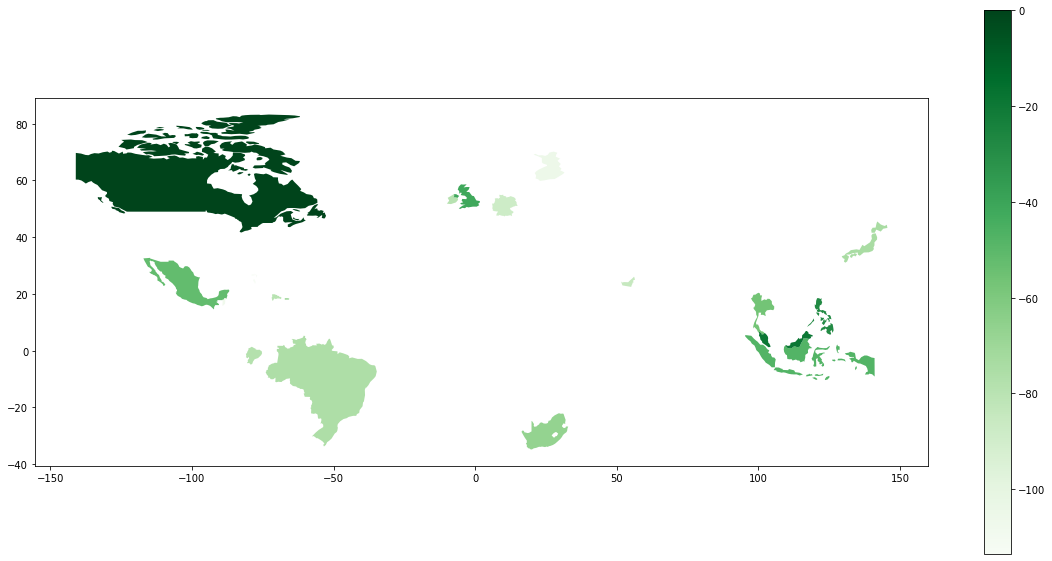

In [33]:
import pycountry
import geopandas
import math

alpha = 0.05
year = 2017
base_country = 'Malaysia'

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')).set_index('iso_a3')
world.loc[:, 'Probability'] = [0 for _ in range(len(world))]

for country, probability in probabilities.items():
    try:
        abbreviation = pycountry.countries.search_fuzzy(country)[0].alpha_3
        if abbreviation in world.index:
            world.loc[abbreviation, 'Log Probability'] = math.log10(probability)
    except:
        pass

world.plot(column='Log Probability', legend=True, figsize=(20, 10), cmap='Greens');